In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv("training_data.csv")
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,338,15,628,0.509709,1.0,0.645084,14,1,1,0,5.090764,7,0,0,1,0,0,0,-1,677.0,300.512857,7600,843300,333814.285714,1530.384615,6327.800000,3802.813796,737.0,737.0,737.0,0,1,0,0,0,0,0,0,0.471413,0.028572,0.028869,0.442476,0.028670,0.316004,0.047722,0.025478,0.011146,0.695652,0.304348,0.275971,0.033333,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.041667,0.333333,16100
1,715,11,409,0.519608,1.0,0.657480,2,0,1,0,4.958435,4,0,0,0,0,0,1,217,924.0,463.250000,924,51900,25806.000000,924.000000,2745.728395,2052.059623,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0.051045,0.050000,0.798440,0.050000,0.050514,0.272373,0.103533,0.046455,0.017115,0.730769,0.269231,0.295343,0.136364,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.500000,0.000000,508
2,262,7,345,0.609329,1.0,0.783920,5,2,1,0,4.942029,5,0,0,0,1,0,0,-1,165.0,96.800000,7200,843300,339520.000000,1574.500000,4087.158140,3096.370643,7300.0,7300.0,7300.0,1,0,0,0,0,0,0,0,0.041781,0.040465,0.595622,0.282132,0.040001,0.505561,0.190472,0.049275,0.011594,0.809524,0.190476,0.428715,0.062500,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,279,11,217,0.580189,1.0,0.775000,8,2,3,0,4.520737,7,0,0,0,1,0,0,-1,715.0,198.431667,0,843300,340400.000000,0.000000,5573.003432,3225.938984,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.885574,0.028587,0.028638,0.028629,0.028572,0.501918,0.251587,0.069124,0.009217,0.882353,0.117647,0.325667,0.033333,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.050000,0.200000,3100
4,647,13,123,0.739837,1.0,0.887324,3,0,1,0,4.479675,4,0,0,0,0,1,0,217,1900.0,778.000000,0,617900,172900.000000,0.000000,3372.509634,2157.091303,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.312145,0.050039,0.050023,0.050023,0.537770,0.500529,0.115013,0.040650,0.016260,0.714286,0.285714,0.444524,0.200000,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,6900


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_array = data.values
scaled_data_array = scaler.fit_transform(data_array)
df = pd.DataFrame(scaled_data_array, columns=data.columns)

In [ ]:
y = df['shares']
X = df.drop(['shares'], axis = 1)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=52)

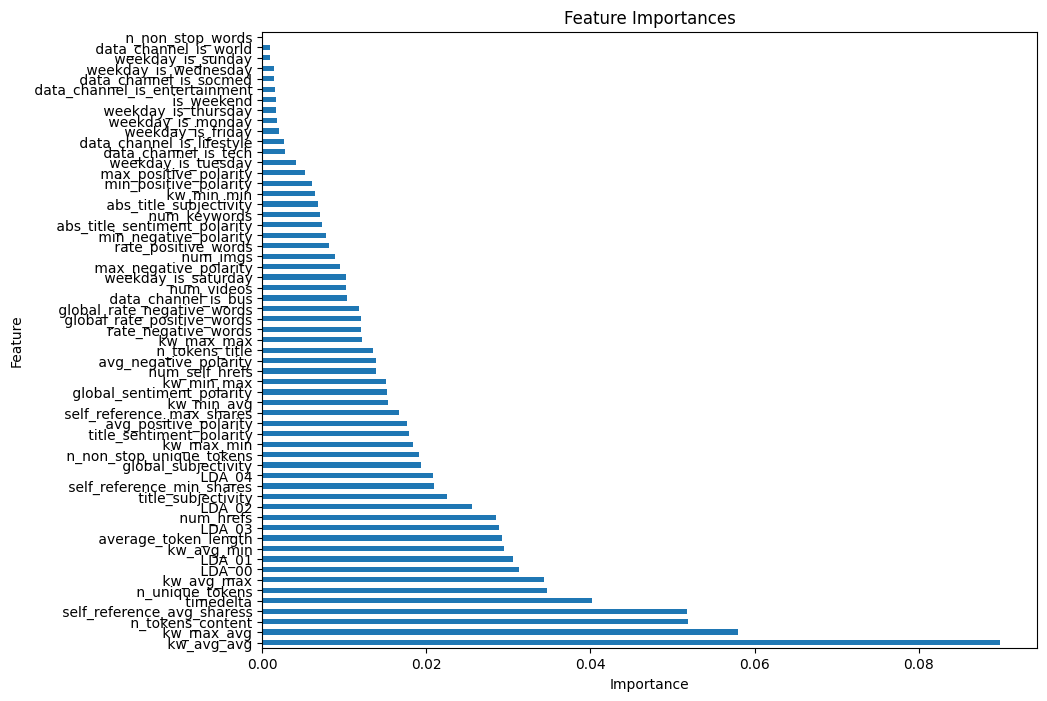

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
feature_importances_sorted.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
important_features = feature_importances[feature_importances >= 0.02].index

In [ ]:
df_filtered = df[important_features]

In [ ]:
df_filtered.shape

(31715, 17)

In [ ]:
X = df_filtered

In [ ]:
X.head()

,timedelta,n_tokens_content,n_unique_tokens,num_hrefs,average_token_length,kw_avg_min,kw_avg_max,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,title_subjectivity
0,-0.074929,0.163991,-0.010739,0.274251,0.642749,-0.023319,0.555255,0.102276,0.492994,-0.173842,-0.240442,1.093736,-0.514313,-0.662564,0.744177,-0.710301,0.541512
1,1.687204,-0.298438,-0.008224,-0.785151,0.486379,0.220739,-1.735538,-0.464187,-0.811080,-0.215315,-0.272191,-0.507411,-0.417156,2.063828,-0.588251,-0.634933,-0.871396
2,-0.430160,-0.433577,0.014573,-0.520301,0.466992,-0.328830,0.597691,-0.252056,-0.033210,0.195479,0.042284,-0.542699,-0.460390,1.345297,0.199820,-0.671209,-0.871396
3,-0.350701,-0.703856,0.007169,-0.255450,-0.030839,-0.176412,0.604236,-0.017087,0.063301,-0.215315,-0.272191,2.671239,-0.514246,-0.663381,-0.660804,-0.710641,0.824093
4,1.369366,-0.902342,0.047734,-0.696868,-0.079361,0.692773,-0.641535,-0.365069,-0.732845,-0.215315,-0.272191,0.487096,-0.416980,-0.587622,-0.588174,1.046229,-0.871396


In [ ]:
X = X.head(15000)
y = y.head(15000)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=52)

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential

In [ ]:
X.shape

(15000, 17)

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X, y, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
375/375 [==============================] - 2s 3ms/step - loss: 1.3496 - val_loss: 0.3765
Epoch 2/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.3257 - val_loss: 0.3724
Epoch 3/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.3102 - val_loss: 0.3618
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.3027 - val_loss: 0.3617
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.3028 - val_loss: 0.3608
Epoch 6/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.2924 - val_loss: 0.3505
Epoch 7/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.2841 - val_loss: 0.3634
Epoch 8/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.2790 - val_loss: 0.3662
Epoch 9/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.2794 - val_loss: 0.3576
Epoch 10/1000
375/375 [==============================] - 1s 4ms/step - loss: 1.270

In [100]:
model.save('trained_model.h5')

In [ ]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)

In [ ]:
# print("Mean Squared Error:", mse)

In [95]:
df_test = pd.read_csv("test.csv")
df_test.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,121,12,1015,0.422018,1.0,0.545031,10,6,33,1,4.656158,4,0,0,1,0,0,0,-1,263.0,110.500000,6500,843300,398350.000000,1809.075,3483.806797,2729.047648,1100.0,22100.0,6475.0,0,1,0,0,0,0,0,0,0.331582,0.050050,0.050035,0.050000,0.518333,0.471175,0.159889,0.041379,0.008867,0.823529,0.176471,0.333534,0.100000,0.8,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900
1,532,9,503,0.569697,1.0,0.737542,9,0,1,1,4.576541,10,0,0,0,0,1,0,4,3200.0,524.750000,0,843300,117960.000000,0.000,4228.114286,2387.526307,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0.020007,0.020008,0.325602,0.020004,0.614379,0.477791,0.123520,0.033797,0.019881,0.629630,0.370370,0.419786,0.136364,1.0,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300
2,435,9,232,0.646018,1.0,0.748428,12,3,4,1,4.935345,6,0,0,0,0,0,0,4,939.0,198.666667,970,843300,573878.333333,954.500,6192.239067,4385.022237,1400.0,58800.0,30100.0,0,0,1,0,0,0,0,0,0.033334,0.033697,0.033333,0.866302,0.033333,0.522234,-0.163235,0.017241,0.043103,0.285714,0.714286,0.468750,0.375000,0.5,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700
3,134,12,171,0.722892,1.0,0.867925,9,5,0,1,4.970760,6,0,0,1,0,0,0,-1,2100.0,444.166667,5600,843300,311033.333333,2076.520,4529.427500,3269.856640,974.0,5600.0,2574.8,0,0,1,0,0,0,0,0,0.700107,0.033335,0.033334,0.199402,0.033822,0.405128,-0.006410,0.011696,0.029240,0.285714,0.714286,0.500000,0.500000,0.5,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500
4,728,11,286,0.652632,1.0,0.800000,5,2,0,0,5.006993,8,0,0,0,0,1,0,217,552.0,356.200000,0,28000,6830.125000,0.000,2240.536313,976.913444,822.0,822.0,822.0,0,0,0,1,0,0,0,0,0.214708,0.025062,0.025016,0.025187,0.710028,0.418036,0.060089,0.034965,0.024476,0.588235,0.411765,0.303429,0.100000,0.6,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400


In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_array1 = df_test.values
scaled_data_array1 = scaler.fit_transform(data_array1)
df1 = pd.DataFrame(scaled_data_array, columns=data.columns)

In [97]:
df1.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,-0.074929,2.167176,0.163991,-0.010739,-0.000485,-0.013126,0.274251,-0.600388,-0.427951,-0.301914,0.642749,-0.119237,-0.236951,-0.467485,2.311767,-0.250385,-0.477720,-0.518364,-0.387427,-0.120475,-0.023319,-0.103571,0.421847,0.555255,0.360465,0.102276,0.492994,-0.173842,-0.230252,-0.240442,-0.452340,2.092623,-0.478815,-0.472485,-0.410888,-0.257699,-0.271213,-0.387904,1.093736,-0.514313,-0.662564,0.744177,-0.710301,-1.092403,-0.740173,-0.813183,-0.505093,0.070704,0.106799,-0.742313,-0.871878,0.172098,0.002284,0.076074,0.077773,0.541512,0.983073,-1.591575,0.777279,1.076891
1,1.687204,0.281576,-0.298438,-0.008224,-0.000485,-0.009729,-0.785151,-0.861837,-0.427951,-0.301914,0.486379,-1.689666,-0.236951,-0.467485,-0.432569,-0.250385,-0.477720,1.929145,2.756320,-0.060778,0.220739,-0.219232,-3.288931,-1.735538,-0.172533,-0.464187,-0.811080,-0.215315,-0.247827,-0.272191,-0.452340,-0.477869,2.088490,-0.472485,-0.410888,-0.257699,-0.271213,-0.387904,-0.507411,-0.417156,2.063828,-0.588251,-0.634933,-1.466708,-0.163523,0.391688,0.048433,0.255428,-0.118601,-0.557002,0.586949,-1.036872,0.988459,1.223900,0.077773,-0.871396,-0.266541,0.838354,-0.689110,-0.246515
2,-0.430160,-1.604023,-0.433577,0.014573,-0.000485,0.024919,-0.520301,-0.338939,-0.427951,-0.301914,0.466992,-1.166190,-0.236951,-0.467485,-0.432569,3.993849,-0.477720,-0.518364,-0.387427,-0.244219,-0.328830,-0.110501,0.421847,0.597691,0.399241,-0.252056,-0.033210,0.195479,-0.073740,0.042284,2.210729,-0.477869,-0.478815,-0.472485,-0.410888,-0.257699,-0.271213,-0.387904,-0.542699,-0.460390,1.345297,0.199820,-0.671209,0.533789,0.734739,0.553696,-0.463572,0.669696,-0.624089,0.718803,-0.458901,-0.633882,-0.181514,-0.956971,0.600908,-0.871396,-0.266541,0.838354,-0.689110,-0.179292
3,-0.350701,0.281576,-0.703856,0.007169,-0.000485,0.022474,-0.255450,-0.338939,-0.187658,-0.301914,-0.030839,-0.119237,-0.236951,-0.467485,-0.432569,3.993849,-0.477720,-0.518364,-0.387427,-0.111291,-0.176412,-0.235240,0.421847,0.604236,-0.984708,-0.017087,0.063301,-0.215315,-0.247827,-0.272191,-0.452340,-0.477869,-0.478815,-0.472485,2.433754,-0.257699,-0.271213,-0.387904,2.671239,-0.514246,-0.663381,-0.660804,-0.710641,0.502535,1.366193,1.693777,-0.684077,1.052794,-1.091545,-0.266931,-0.871878,-1.036872,1.263655,1.367379,0.376707,0.824093,0.483227,-1.547395,0.190724,-0.026513
4,1.369366,1.224376,-0.902342,0.047734,-0.000485,0.053254,-0.696868,-0.861837,-0.427951,-0.301914,-0.079361,-1.689666,-0.236951,-0.467485,-0.432569,-0.250385,2.093277,-0.518364,2.756320,0.175108,0.692773,-0.235240,-0.635026,-0.641535,-0.984708,-0.365069,-0.732845,-0.215315,-0.247827,-0.272191,2.210729,-0.477869,-0.478815,-0.472485,-0.410888,-0.257699,-0.271213,-0.387904,0.487096,-0.416980,-0.587622,-0.588174,1.046229,0.490620,-0.044907,0.058300,-0.030839,0.168721,-0.012801,0.870030,1.487989,0.978078,-2.276581,-1.645667,0.077773,-0.871396,-0.266541,0.838354,-0.689110,0.296020


In [101]:
df_filtered1 = df1[important_features]

In [103]:
y1 = df1['shares']
X1= df1.drop(['shares'], axis = 1)

In [104]:
X1 = df_filtered1

In [105]:
X1.shape

(31715, 17)

In [107]:
X1 = X1.head(15000)

In [110]:
y1 = y1.head(15000)

In [108]:
model = load_model('trained_model.h5')

predictions = model.predict(X1)

469/469 [==============================] - 1s 2ms/step


In [111]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.239717442011322
